# Modulos a utilizar

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Limpar os dados fornecidos pelo website, só necessário uma vez

In [11]:
confirm = input('Tem a certeza que quer recalcular os dados mensais? (sim para executar) ')
if confirm == 'sim':
    # Ler o ficheiro csv
    df = pd.read_csv('HistoricalData.csv')
    # apagar o desncessário
    df = df.drop(['Open', 'High', 'Low'], axis=1)
    # Mudar o nome da coluna 'Close/Last' para 'Value'
    df = df.rename(columns={'Close/Last': 'Value'})
    # Converter a coluna 'Date' para o tipo datetime (integracão com o pandas)
    df['Date'] = pd.to_datetime(df['Date'])

    # COnverter a coluna 'Value' para numérico e remover o simbolo '$'
    df['Value'] = df['Value'].str.replace('$', '')
    df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
    
    # Converter a coluna 'Volume' para numérico e remover o simbolo 'M'
    df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')

    # Usar a coluna 'Date' como coluna de referência, ou index
    df.set_index('Date', inplace=True)

    # Cria um novo DataFrame com os dados recalculados para cada mês, através da média de todos os dias do mês
    df_monthly = df.resample('M').mean()
    df_monthly = df_monthly.round(2)

    # Gravar o novo DataFrame num ficheiro csv
    df_monthly.to_csv('MonthlyData.csv')
else:
    print('Operação cancelada')


# Operações realizadas

- **Carregar um ficheiro CSV**: O ficheiro 'HistoricalData_1704576642353.csv' é carregado para um DataFrame denominado `df`.

- **Conversão da coluna 'Date'**: A coluna 'Date' é convertida para o tipo `datetime`, que é mais adequado para a manipulação de datas no pandas.

- **Limpeza e conversão da coluna 'Value'**: A coluna 'Value' é limpa para remover o símbolo '$' e convertida para numérico, o que permite a realização de operações matemáticas.

- **Conversão da coluna 'Volume'**: A coluna 'Volume' também é convertida para um formato numérico.

- **Definição do índice do DataFrame**: A coluna 'Date' é definida como o índice do DataFrame, facilitando as operações baseadas em datas.

- **Criação do DataFrame df_monthly**: É criado um novo DataFrame chamado `df_monthly` que contém a média dos valores para cada mês, proporcionando uma visão agregada e simplificada dos dados.

- **Arredondamento dos valores**: Os valores mensais médios são arredondados para duas casas decimais para garantir consistência e clareza.

- **Gravação do novo DataFrame**: Por fim, o DataFrame `df_monthly` é guardado num novo ficheiro CSV intitulado 'MonthlyData.csv'.


### Ler o ficheiro CSV
A função load permite a leitura dos dados já tratados para a sua análise.

In [12]:
# Ler o ficheiro csv
def load():
    df = pd.read_csv('MonthlyData.csv')
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    return df

# Análise inicial
Como ponto de partida, irá ser analisada a evolução histórica do valor das ações e do volume transacionado.

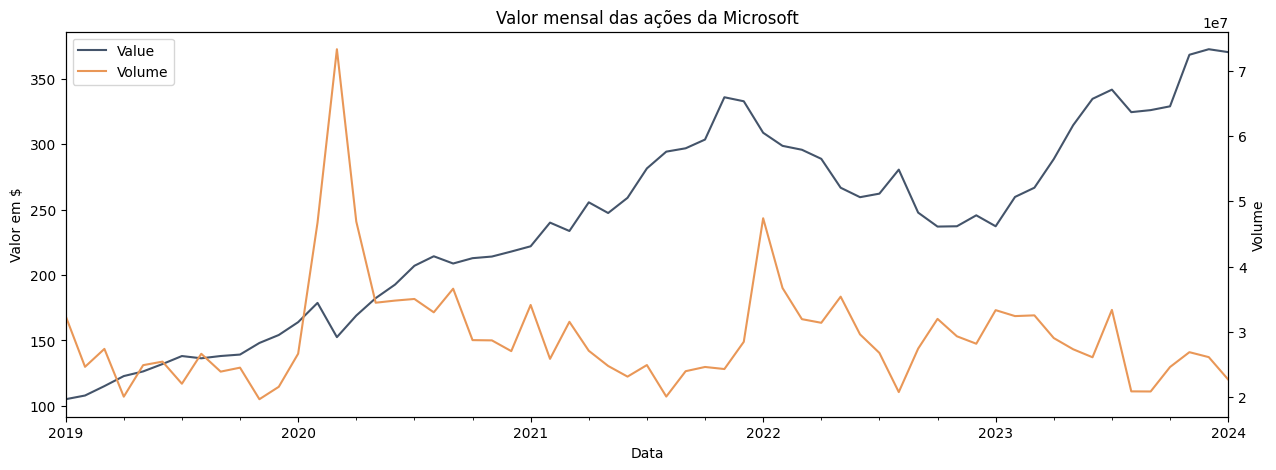

In [13]:
df = load()

# Definir o gráfico e os dados a apresentar, neste caso o valor das ações
plt.figure(figsize=(15, 5))


# Definir o título do gráfico e os nomes das legendas
ax = df['Value'].plot(kind='line', color=(0.267, 0.329, 0.416, 1.0), label='Value (left)', title='Valor mensal das ações da Microsoft')
ax.set_xlabel('Data')
ax.set_ylabel('Valor em $')

# Plotando 'Volume' no eixo secundário
ax_right = df['Volume'].plot(kind='line', secondary_y=True, color=(0.914, 0.592, 0.341, 1.0), label='Volume')
ax_right.set_ylabel('Volume')

# Definir o título do gráfico e os nomes das legendas
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax_right.get_legend_handles_labels()
ax.legend(lines + lines2, ['Value', 'Volume'], loc='upper left')
ax.set_xlabel('Data')
ax.set_ylabel('Valor em $')

# Mostrar o gráfico
plt.show()

### Resumo das Operações Gráficas

A visualização dos dados é realizada através da criação de um gráfico que representa o valor médio mensal das ações da Microsoft. 
Uma vez que o valor das ações de mercado varia diáriamente, para esta análise foi considerada a média mensal de cada mês.

- **Configuração do Gráfico**: 
  - Inicialmente, define-se o tamanho do gráfico com `plt.figure(figsize=(15, 5))`.
  - O valor das ações, representado pela coluna 'Value', é representado num gráfico de linha com a cor azul, sendo este definido como o eixo principal (`ax`).
  - O eixo das abscissas (X) é identificado como 'Date' e o eixo das ordenadas (Y) é identificado como 'Valor em $'.

- **Representação dos Dados**: 
  - A série temporal do valor das ações é apresentada através de uma linha com a cor azul, enquanto o volume de transações é representado numa linha secundária com a cor laranja.
  - O rótulo do eixo secundário é definido como 'Volume'.

- **Legendas**: 
  - As legendas são criadas para ambas as séries, 'Value' e 'Volume', e posicionadas no canto superior esquerdo do gráfico.

- **Exibição do Gráfico**: 
  - O gráfico é exibido com a chamada a `plt.show()`, mostrando a relação entre o valor das ações e o volume de transações ao longo do tempo.


### Interpretação dos Dados Estatísticos

O gráfico apresenta duas séries temporais: o valor das ações da Microsoft ("Value") e o volume de ações negociadas ("Volume"), com uma correlação visível entre ambas. A série "Value", representada em azul, mostra o preço das ações ao longo do tempo, enquanto a série "Volume", em laranja, indica a quantidade de ações negociadas.

A análise deste gráfico permite identificar tendências e padrões no comportamento das ações da Microsoft. Por exemplo, um aumento no valor das ações frequentemente acompanha um aumento no volume de ações negociadas, o que pode indicar uma maior confiança dos investidores na empresa ou resposta a eventos positivos, como lançamentos de produtos inovadores, resultados financeiros favoráveis ou mudanças estratégicas benéficas.

Por outro lado, declínios no valor das ações podem estar associados a desafios enfrentados pela empresa, como concorrência, mudanças de paradigma regulamentar, ou condições econômicas adversas globais. Eventos específicos, como a pandemia de COVID-19, também podem ter impacto significativo tanto no valor quanto no volume de negociação das ações.

É importante notar que o volume de negociação pode aumentar tanto em períodos de alta quanto de baixa do mercado, refletindo o sentimento geral dos investidores.

# Valores Centrais

#### Calculo de média e desvio padrão


In [19]:
# ler o ficheiro csv    
df=load()

# Converter a coluna 'Date' para o tipo datetime (integracão com o pandas), calcular a média e arredondar os valores para duas casas decimais
df_semester = df.resample('6M').mean().round(2)

'''Média'''
print(f'Médias: \n')
#iterar pelos valores do dataframe
for semester in df_semester.index:
    #obter os valores da linha do dataframe
    i = df_semester.loc[semester]
    # buscar o ano e o semestre
    year = semester.year
    half = '1º' if semester.month <= 6 else '2º'
    # escrever a linha no ficheiro
    print(f"{year} - {half} Semestre | Valor - {i['Value']:.2f} | Volume - {i['Volume']:.2f}\n")

'''Desvio Padrão'''
# usar a função std() para calcular o desvio padrão e arredondar os valores para duas casas decimais
std_dev = df.std().round(2)
# escrever o resultado no ecrã
print(f'Desvio Padrão: \n')
print(f"Valor - {std_dev['Value']:.2f}  | Volume - {std_dev['Volume']:.2f}\n")




Médias: 

2019 - 1º Semestre | Valor - 105.10 | Volume - 32408625.00

2019 - 2º Semestre | Valor - 123.71 | Volume - 24057631.72

2020 - 1º Semestre | Valor - 146.67 | Volume - 23804739.40

2020 - 2º Semestre | Valor - 180.40 | Volume - 45197939.71

2021 - 1º Semestre | Valor - 215.02 | Volume - 31348386.96

2021 - 2º Semestre | Valor - 252.87 | Volume - 26200452.16

2022 - 1º Semestre | Valor - 312.02 | Volume - 28123122.12

2022 - 2º Semestre | Valor - 278.62 | Volume - 31953716.48

2023 - 1º Semestre | Valor - 247.58 | Volume - 28482664.85

2023 - 2º Semestre | Valor - 300.99 | Volume - 30112791.45

2024 - 1º Semestre | Valor - 348.46 | Volume - 23654735.54

Desvio Padrão: 

Valor - 74.03  | Volume - 8406875.84



### Resumo das Operações de Processamento de Dados

Este segmento de código executa várias operações de processamento de dados temporais:


- **Transformação de Datas e Agregação Semestral**:
  A coluna 'Date' é convertida para o tipo `datetime`, e os dados são agrupados para intervalos semestrais utilizando `resample('6M')`. Posteriormente, calcula-se a média dos valores para estes períodos, arredondando o resultado para duas casas decimais.

- **Apresentação da Média Semestral**:
  Itera-se sobre os índices do `DataFrame` semestral `df_semester`, obtendo-se o ano e se é o primeiro ou segundo semestre. Para cada semestre, devolve-se o valor médio das colunas 'Value' e 'Volume', ambos com formatação de duas casas decimais.

- **Cálculo e Apresentação do Desvio Padrão**:
  O desvio padrão das colunas 'Value' e 'Volume' é calculado a partir do `DataFrame` original `df`, arredondando-se os valores para duas casas decimais. Estes valores são calculados, proporcionando uma medida da dispersão dos dados em relação à média.




#### Apresentação gráfica

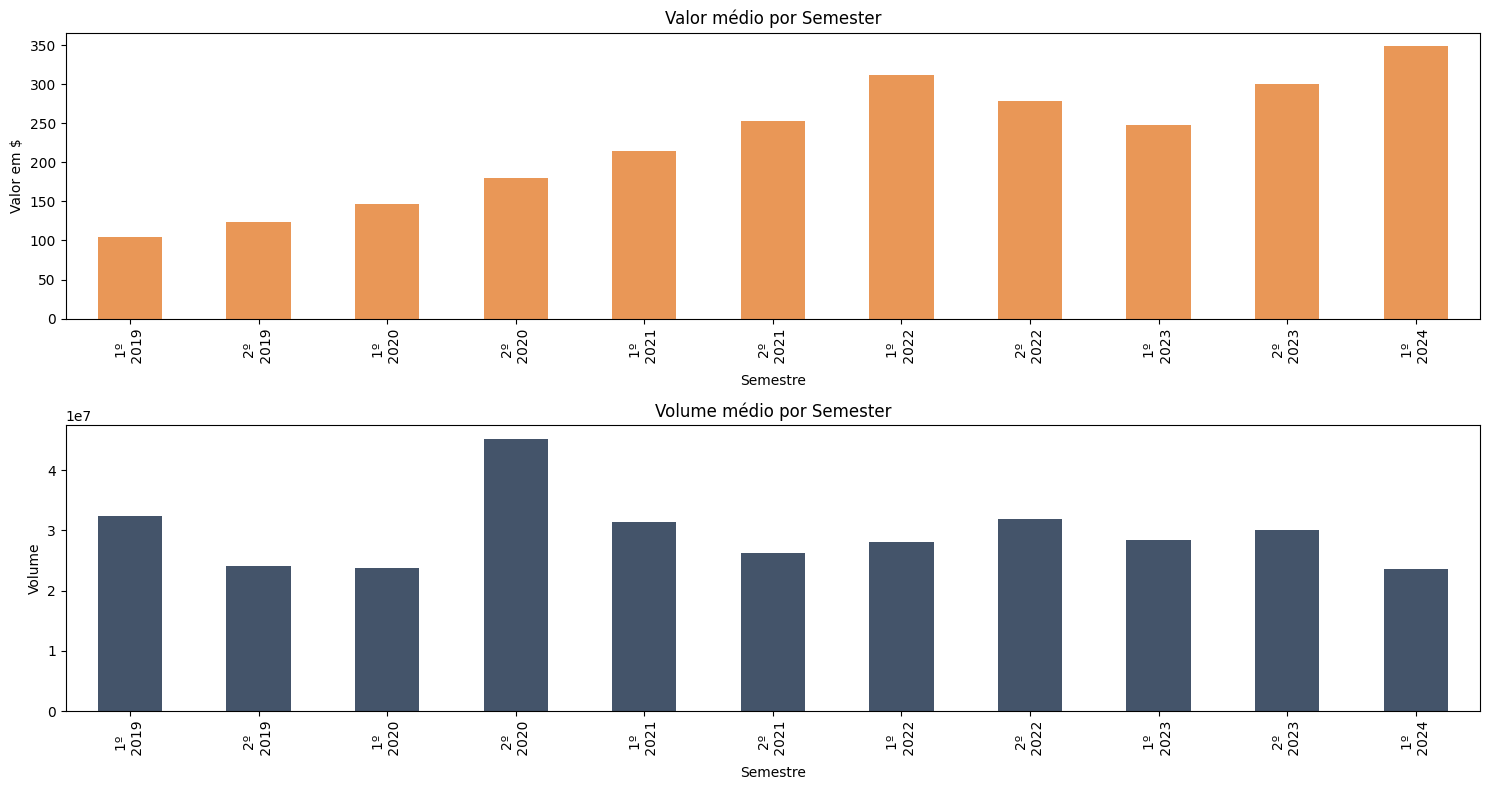

In [20]:
# Criar uma nova coluna 'Semester' com o ano e semestre, para usar como legenda no gráfico, usar a função map para iterar pelos valores do index, neste caso as datas
# usar a função lambda para calcular o semestre 1º ou 2º com base no mês, 1 a 6 ou 7 a 12 respetivamente, e o ano com base no ano da data
df_semester['Semester'] = df_semester.index.map(lambda x: f"{'1º' if x.month <= 6 else '2º'} \n {x.year}")

# Definir a coluna 'Semester' como index
df_semester.set_index('Semester', inplace=True)

# Criar dois gráficos, um para o valor e outro para o volume, num só plot, usando sub
fig, axs = plt.subplots(2, figsize=(15, 8)) 

# Definir Valor como um gráfico de barras no primeiro subplot
df_semester['Value'].plot(kind='bar', ax=axs[0], color = (0.914, 0.592, 0.341, 1.0))
axs[0].set_title('Valor médio por Semester')
axs[0].set_xlabel('Semestre')
axs[0].set_ylabel('Valor em $')
axs[0].tick_params(axis='x', rotation=90)

# Definir Volume como um gráfico de barras no segundo subplot
df_semester['Volume'].plot(kind='bar', ax=axs[1], color = (0.267, 0.329, 0.416, 1.0))
axs[1].set_title('Volume médio por Semester')
axs[1].set_xlabel('Semestre')
axs[1].set_ylabel('Volume')
axs[1].tick_params(axis='x', rotation=90)
# Ajustar os gráficos para não se sobreporem
plt.tight_layout()

# mostrar o gráfico
plt.show()


A análise dos dados semestrais do valor de mercado e do volume de ações da Microsoft revela informações interessantes.

#### Médias Semestrais:

Em cada semestre, observa-se uma variação significativa tanto no valor quanto no volume das ações.
De 2019 a 2024, há uma tendência geral de aumento no valor das ações, começando com uma média de $104.80 no primeiro semestre de 2019 e alcançando $348.28 no primeiro semestre de 2024, tendo em consideração que o primeiro semestre de 2024 contempla apenas os dados da primeira semana de janeiro (data de finalização do relatório).
O volume de ações negociadas também varia, mas não segue uma tendência tão clara quanto o valor das ações.


#### Desvio Padrão:

O desvio padrão para o valor das ações é de $74.01, indicando uma variação considerável no preço das ações ao longo do tempo.
Para o volume de ações, o desvio padrão é de aproximadamente 8.409.113,54, refletindo uma variabilidade significativa na quantidade de ações negociadas.
Essas estatísticas sugerem que o valor das ações da Microsoft tem sido bastante volátil, o que pode ser atribuído a vários fatores, como lançamentos de novos produtos, alterações na gestão da empresa, e mudanças no cenário econômico global, entre outros. 




### Visualização de Dados Semestrais

O código apresentado descreve o processo de criação de visualizações gráficas para dados semestrais:

- **Criação da Coluna 'Semester'**:
  É adicionada uma nova coluna denominada 'Semester' ao `DataFrame df_semester`. Esta coluna é composta pelo ano e pela designação do semestre ('1st' ou '2nd'), calculados a partir das datas existentes no índice do `DataFrame`. Utiliza-se a função `map` juntamente com uma expressão `lambda` para determinar o semestre com base no mês.

- **Definição do Índice**:
  A coluna 'Semester' é definida como o novo índice do `DataFrame`, facilitando a sua utilização como legenda nos gráficos.

- **Criação de Gráficos de Barras**:
  São gerados dois gráficos de barras distintos numa única figura:
  
  1. O primeiro subplot exibe o 'Value', ou seja, o valor médio por semestre. O título é 'Average Value per Semester', o eixo X é identificado como 'Semester' e o eixo Y mostra 'Value in $'. As etiquetas do eixo X são orientadas com uma rotação de 90 graus para melhor legibilidade.
  
  2. O segundo subplot apresenta o 'Volume', ou seja, o volume médio por semestre. De forma similar ao primeiro, o título é 'Average Volume per Semester', e os eixos X e Y são identificados como 'Semester' e 'Volume', respectivamente, com as etiquetas do eixo X também são orientadas com uma rotação de 90 graus.

- **Ajuste e Exibição**:
  Os gráficos são ajustados com `plt.tight_layout()` para assegurar que não haja sobreposição. Finalmente, a figura é exibida com `plt.show()`, permitindo a visualização dos dados de forma clara e organizada.


# Diagrama de extremos e quartis
No proximo código serão criados os diagramas de extremos e quartis anuais.

De notar que os outlier são gerados automaticamente

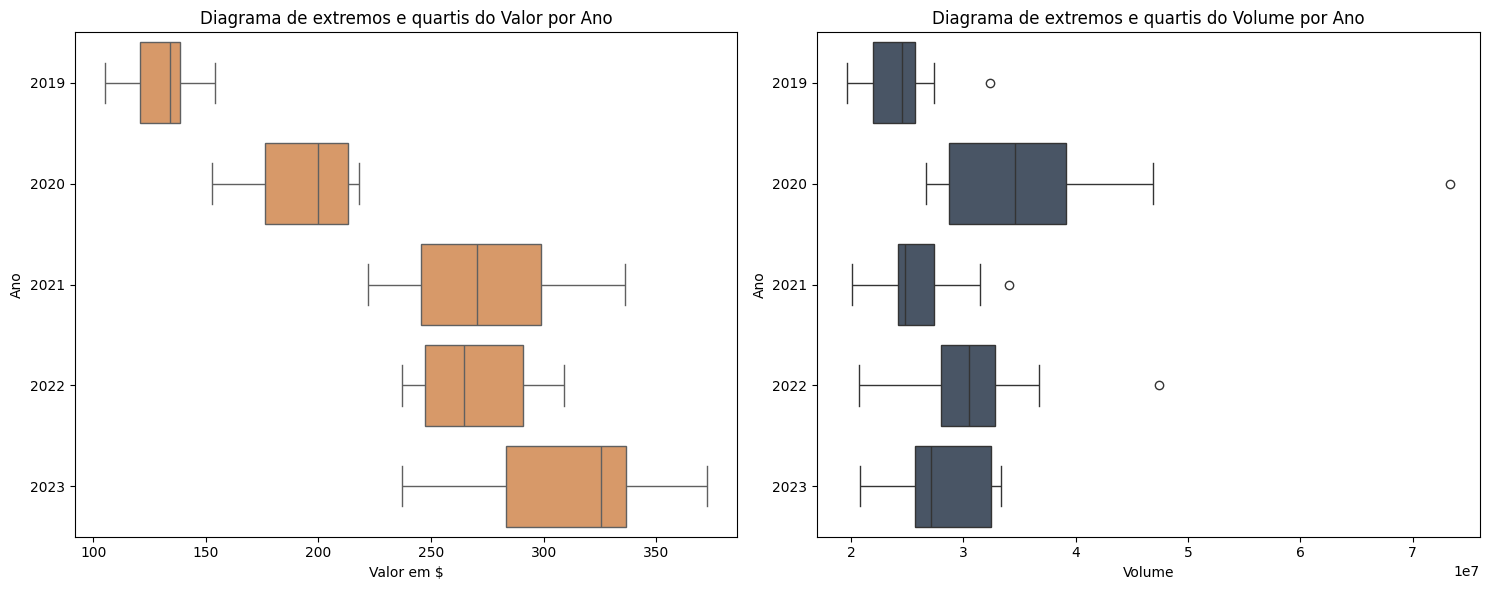

In [24]:
df= load()
# Para criar um diagrama de extremos e quartis (boxplot) para cada ano, precisamos agrupar os dados por ano.

# Primeiro, vou retirar o ano de 2024, porque só temos dados de janeiro
df = df[df.index.year < 2024]
# Depois vamos agrupar os dados por ano e depois criar o boxplot para cada ano.
df['Year'] = df.index.year

# Definir o tamanho do gráfico
plt.figure(figsize=(15, 6))

# Começar por criar o primeiro diagrama de extremos e quartis para 'Value'
plt.subplot(1, 2, 1)
sns.boxplot(x='Value', y='Year', data=df, orient='h', color= (0.914, 0.592, 0.341, 1.0))
plt.title('Diagrama de extremos e quartis do Valor por Ano')
plt.xlabel('Valor em $')
plt.ylabel('Ano')

# Criando boxplot para 'Volume'
plt.subplot(1, 2, 2)
sns.boxplot(x='Volume', y='Year', data=df, orient='h', color=(0.267, 0.329, 0.416, 1.0))
plt.title('Diagrama de extremos e quartis do Volume por Ano')
plt.xlabel('Volume')
plt.ylabel('Ano')

# Ajustando layout do gráfico para não se sobreporem
plt.tight_layout()

# Mostrar o gráfico
plt.show()


## Geração de Diagramas de Extremos e Quartis (Boxplots)

O código apresentado descreve o processo para a criação de boxplots que representam a distribuição do 'Valor' e do 'Volume' por ano, com os seguintes passos:

- **Preparação dos Dados**:
  - Os dados são carregados em um `DataFrame` com a função `load()`.
  - Remove-se o ano de 2024 do conjunto de dados, pois só contém informação referente a janeiro, o que pode distorcer a análise anual.

- **Agrupamento por Ano**:
  - Uma nova coluna 'Year' é criada para agrupar os dados por ano.

- **Configuração e Criação dos Boxplots**:
  - Define-se o tamanho da figura do gráfico para `(15, 6)`.
  - No primeiro subplot, cria-se o boxplot para 'Value', orientado horizontalmente, com o título 'Diagrama de extremos e quartis do Valor por Ano'. O eixo X é identificado como 'Valor em $' e o eixo Y como 'Ano'.
  - No segundo subplot, procede-se de forma análoga para 'Volume', com o título 'Diagrama de extremos e quartis do Volume por Ano'.

- **Ajustes Finais e Visualização**:
  - Utiliza-se `plt.tight_layout()` para ajustar o layout e evitar sobreposições entre os elementos gráficos.
  - O gráfico é exibido com `plt.show()`, permitindo a visualização dos boxplots que representam as distribuições dos valores e volumes anuais.


### Interpretação dos dados estatísticos

**Diagrama de extremos e quartis do Valor por Ano:**

Variação e Tendência: Existe uma tendência ascendente no valor médio das ações da Microsoft ao longo dos anos, começando de um valor mais baixo em 2019 e aumentando gradualmente até 2023.
Dispersão e Outliers: A dispersão (representada pela extensão das caixas e dos 'bigodes') também aumenta, indicando maior volatilidade nos preços das ações em anos mais recentes.



**Diagrama de extremos e quartis do Volume por Ano:**

Variação e Tendência: O volume de ações negociadas varia significativamente de ano para ano, sem uma tendência clara ascendente ou descendente ao longo do tempo.
Dispersão e Outliers: Há uma variação considerável no volume de ações negociadas, nalguns anos existe uma dispersão maior, indicando períodos de maior atividade de negociação. Outliers, aqui, podem indicar meses de atividade de negociação extraordinariamente alta.



**Interpretação e Insights:**

Estes padrões refletem o comportamento dinâmico do mercado de ações e podem estar relacionados a eventos específicos, como lançamentos de novos produtos, mudanças na liderança da empresa, ou mudanças no ambiente econômico global, entre outros.
A crescente variação no valor das ações sugere um aumento no risco e na oportunidade, possivelmente atraindo diferentes perfis de investidores.
A variação no volume de negociações pode ser influenciada por fatores externos, como mudanças nas políticas econômicas, crises financeiras globais, ou eventos significativos dentro da empresa. ​​







# Indice de associação


In [25]:
# Usando as funções do pandas para calcular o coeficiente de correleração de Pearson, obtemos o seguinte :
df = load()
print('Coeficiente de correlação de Pearson:')
print(df.corr(method='pearson'))


Coeficiente de correlação de Pearson:
           Value    Volume
Value   1.000000 -0.126901
Volume -0.126901  1.000000


### Cálculo do Coeficiente de Correlação de Pearson

Este código descreve o processo de cálculo do coeficiente de correlação de Pearson utilizando o pandas:

- **Cálculo da Correlação**:
  - Aplica-se o método `corr()` ao `DataFrame` para calcular o coeficiente de correlação de Pearson entre as variáveis.
  - O parâmetro `method='pearson'` especifica que o tipo de correlação a ser calculado é o de Pearson.

- **Exibição dos Resultados**:
  - O resultado, que é uma matriz de correlação, é exibido usando a função `print()`.
  - Esta matriz mostra o coeficiente de correlação entre cada par de colunas no `DataFrame`.

O coeficiente de correlação de Pearson é uma medida estatística que descreve a relação linear entre duas variáveis. Valores próximos de 1 ou -1 indicam uma forte correlação positiva ou negativa, respectivamente, enquanto valores próximos de 0 indicam ausência de correlação linear.


### Interpretação dos dados estatísticos

O coeficiente de correlação de Pearson entre o valor das ações ("Value") e o volume de ações negociadas ("Volume") da Microsoft é de aproximadamente -0.128. Este valor indica uma correlação negativa muito fraca entre as duas variáveis. Em termos práticos, isto sugere que:

**Correlação Negativa Fraca:** Um aumento no valor das ações não está fortemente associado a um aumento no volume de ações negociadas, e vice-versa. De fato, a tendência é ligeiramente oposta, mas é importante notar que a força dessa relação é muito fraca.

**Independência Relativa:** Dado o baixo valor de correlação, pode-se inferir que o valor das ações e o volume de negociação são relativamente independentes um do outro. Isso significa que variações numa dessas métricas não são bons preditores de variações na outra.

**Insights para Investidores:** Para investidores e analistas, isso implica que outros fatores, além do volume de negociação, devem ser considerados ao avaliar o valor das ações da Microsoft. Fatores como desempenho financeiro da empresa, lançamentos de produtos, mudanças na liderança, e condições de mercado mais amplas podem ter um impacto mais significativo no valor das ações.

**Considerações de Mercado:** Essa fraca correlação também sugere que as decisões de compra e venda no mercado podem ser influenciadas por uma variedade de fatores, e não apenas pelo comportamento do preço das ações. Por exemplo, decisões de investidores institucionais, notícias de mercado, ou mudanças na economia podem ter um papel mais relevante.

Em resumo, a correlação de Pearson sugere que o valor das ações da Microsoft e o volume de negociação operam com um nível de independência significativo, o que é uma informação útil para estratégias de investimento e análise de mercado. ​

# Diagrama de Dispersão

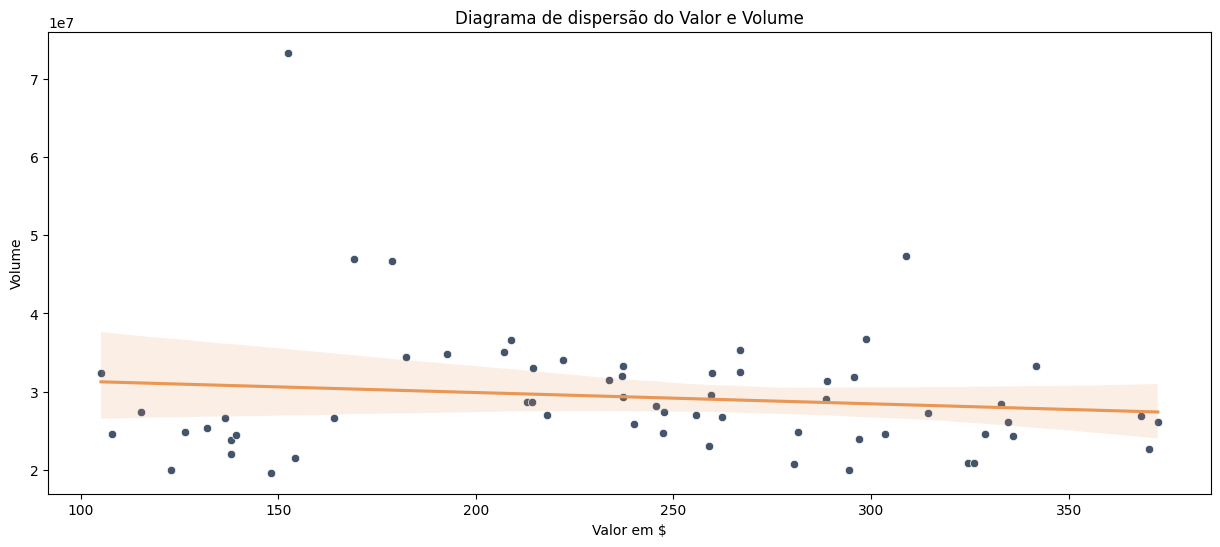

In [26]:
# Diagrama de dispersão
df = load()

# Definir o tamanho do gráfico
plt.figure(figsize=(15, 6))

# Criar o diagrama de dispersão
sns.scatterplot(x='Value', y='Volume', data=df , color= (0.267, 0.329, 0.416, 1.0))

# Criar a reta de regressão linear
sns.regplot(x='Value', y='Volume', data=df, scatter=False, color= (0.914, 0.592, 0.341, 1.0))
plt.title('Diagrama de dispersão do Valor e Volume')
plt.xlabel('Valor em $')
plt.ylabel('Volume')

plt.show()



### Interpretação dos dados estatísticos
A regressão linear no diagrama de dispersão entre 'Value' e 'Volume' revela uma correlação negativa fraca. 
Este resultado indica que, embora exista uma tendência, o volume de negociações não é fortemente influenciado pelas variações no valor das ações. 

Esta observação pode ser interpretada como um indicativo de que as decisões de compra e venda de ações por parte dos investidores não são diretamente guiadas por mudanças no valor de mercado da ação. Tal comportamento sugere que fatores como confiança na gestão da empresa, performance de longo prazo e estabilidade no mercado podem ter um impacto mais significativo nas decisões dos investidores do que variações pontuais no valor das ações.